In [2]:
import numpy as np # linear algebra
import pandas as pd 

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

## Preprocess Datas

In [4]:
df = pd.read_csv("train.csv") # load data

In [5]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [6]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


**Normalize data**

In [7]:
X = X / 255

**Split data to train and test set**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (31500, 784)
X_test: (10500, 784)
y_train: (31500,)
y_test: (10500,)


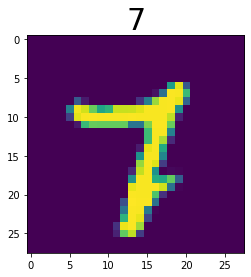

In [10]:
img = X_train[0].reshape(28,28,1)
plt.imshow(img)
plt.title(y_train[0],fontdict={'fontsize':30})
plt.show()

## Building a neural network model

**Creating a sequntial model**

In [11]:
model = Sequential()

In [12]:
model.add(Dense(512,activation='relu', input_dim=784))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
# Add last output generating layer in our model
model.add(Dense(10,activation='softmax'))

# getting model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=SGD(learning_rate = 1e-2),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,verbose=1,validation_data=(X_test,y_test),batch_size=128,epochs=20)

Epoch 1/20
247/247 [==============================] - 2s 7ms/step - loss: 1.9211 - accuracy: 0.3317 - val_loss: 1.1964 - val_accuracy: 0.7671
Epoch 2/20
247/247 [==============================] - 1s 5ms/step - loss: 1.2487 - accuracy: 0.5977 - val_loss: 0.7411 - val_accuracy: 0.8340
Epoch 3/20
247/247 [==============================] - 1s 5ms/step - loss: 0.9775 - accuracy: 0.6922 - val_loss: 0.5800 - val_accuracy: 0.8587
Epoch 4/20
247/247 [==============================] - 1s 5ms/step - loss: 0.8353 - accuracy: 0.7380 - val_loss: 0.4953 - val_accuracy: 0.8747
Epoch 5/20
247/247 [==============================] - 1s 5ms/step - loss: 0.7445 - accuracy: 0.7687 - val_loss: 0.4373 - val_accuracy: 0.8858
Epoch 6/20
247/247 [==============================] - 1s 5ms/step - loss: 0.6786 - accuracy: 0.7916 - val_loss: 0.4023 - val_accuracy: 0.8921
Epoch 7/20
247/247 [==============================] - 1s 5ms/step - loss: 0.6370 - accuracy: 0.8077 - val_loss: 0.3793 - val_accuracy: 0.8961
Epoch 

In [15]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

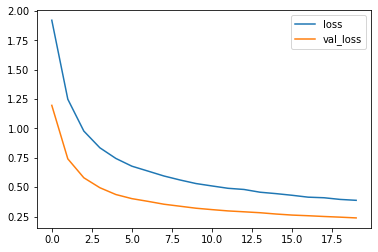

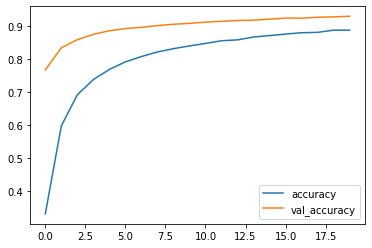

In [16]:
loss_df[['loss','val_loss']].plot()
loss_df[['accuracy','val_accuracy']].plot()

**Predict**

1/1 [==============================] - 0s 60ms/step


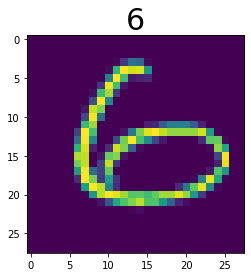

In [17]:
index = 10
img = X_test[index].reshape(28,28,1)
plt.imshow(img)
plt.title(np.argmax(model.predict(X_test[index:index+1, :])),fontdict={'fontsize':30})
plt.show()

## Try it yourself